In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib nbagg

import time
import numpy as np
import matplotlib.pyplot as plt

from robmob.icp import icp
from robmob.robot import Robot
from robmob.sensors import HokuyoSensor

In [2]:
robot = Robot('192.168.0.108')
robot.connect()

In [3]:
hokuyo = HokuyoSensor()
robot.add_sensor(hokuyo)

In [4]:
def hokuyo_to_3d_homogeneous_matrix(hokuyo_data):
    ranges = np.array(hokuyo_data['ranges'])
    thetas = np.arange(hokuyo_data['angle_min'], hokuyo_data['angle_max']+hokuyo_data['angle_increment'], hokuyo_data['angle_increment'])
    xs = ranges * np.cos(thetas)
    ys = ranges * np.sin(thetas)
    
    pts = np.vstack((xs, ys, np.zeros(xs.shape), np.ones(xs.shape))).T
    
    # Remove the points that are at the origin.
    pts = pts[np.nonzero(np.logical_or(pts[:,0] != 0., pts[:,1] != 0.))]
    
    return pts

In [5]:
def plot_point_clouds(pcls):
    STYLES = ['r+', 'bx', 'g*']
    
    for i, pcl in enumerate(pcls):
        plt.plot(pcl[:,0], pcl[:,1], STYLES[i])
        plt.plot([0.0], [0.0], 'ko', markersize=10)
        
    plt.axis('equal')
    
    plt.show()

In [6]:
reading1 = hokuyo.peek_data()
pcl1 = hokuyo_to_3d_homogeneous_matrix(reading1)

In [7]:
reading2 = hokuyo.peek_data()
pcl2 = hokuyo_to_3d_homogeneous_matrix(reading2)

<IPython.core.display.Javascript object>


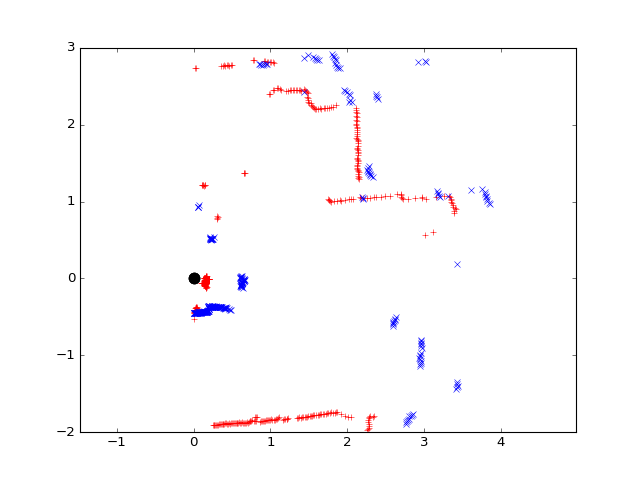

In [8]:
plot_point_clouds([pcl1, pcl2])

In [9]:
H, errs = icp(pcl1, pcl2)
print('La distance moyenne entre les points associés est de {}'.format(np.average(errs)))

La distance moyenne entre les points associés est de 0.3908643293285496


In [10]:
H

array([[ 0.93746922, -0.34806818,  0.        ,  0.79252324],
       [ 0.34806818,  0.93746922,  0.        , -0.2546068 ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [11]:
moved_pcl = H.dot(pcl1.T)
moved_pcl = moved_pcl.T
moved_pcl

array([[ 0.97665128, -0.75052801,  0.        ,  1.        ],
       [ 0.94855513, -0.66708111,  0.        ,  1.        ],
       [ 0.95467855, -0.67544722,  0.        ,  1.        ],
       ..., 
       [ 0.46704059,  0.92324933,  0.        ,  1.        ],
       [-0.1302635 ,  2.3274523 ,  0.        ,  1.        ],
       [-0.14437776,  2.31704354,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


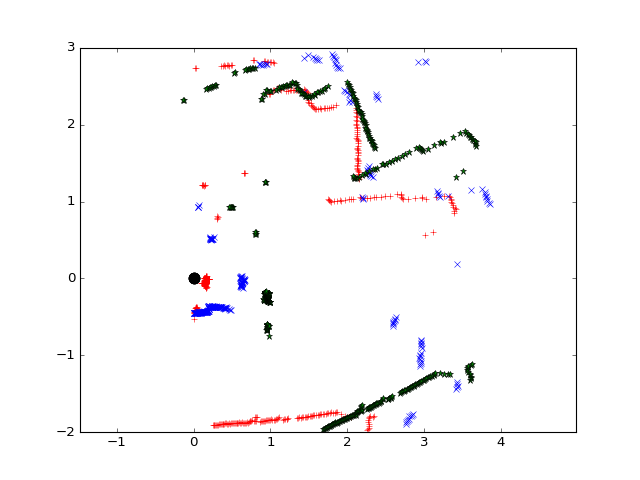

In [12]:
plot_point_clouds([pcl1, pcl2, moved_pcl])

In [ ]:
pcl2